---
# Density Functional Theory for H<sub>2</sub> Molecule
## Part 1 - Calculation of Density Fuctional
#### [C. N. Rangkuti ](https://quasi.id/team/staff/choi002.html) - [Research Center for Quantum Physics, BRIN, Indonesia](https://quantumresearch.id/)

---

In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import seaborn as sns 

interactive(children=(FloatSlider(value=1.4, description='R (Bohr)', max=3.0), Output()), _dom_classes=('widge…

interactive(children=(FloatSlider(value=1.4, description='R (Bohr)', max=3.0), Output()), _dom_classes=('widge…

<function __main__.plot_func(R)>

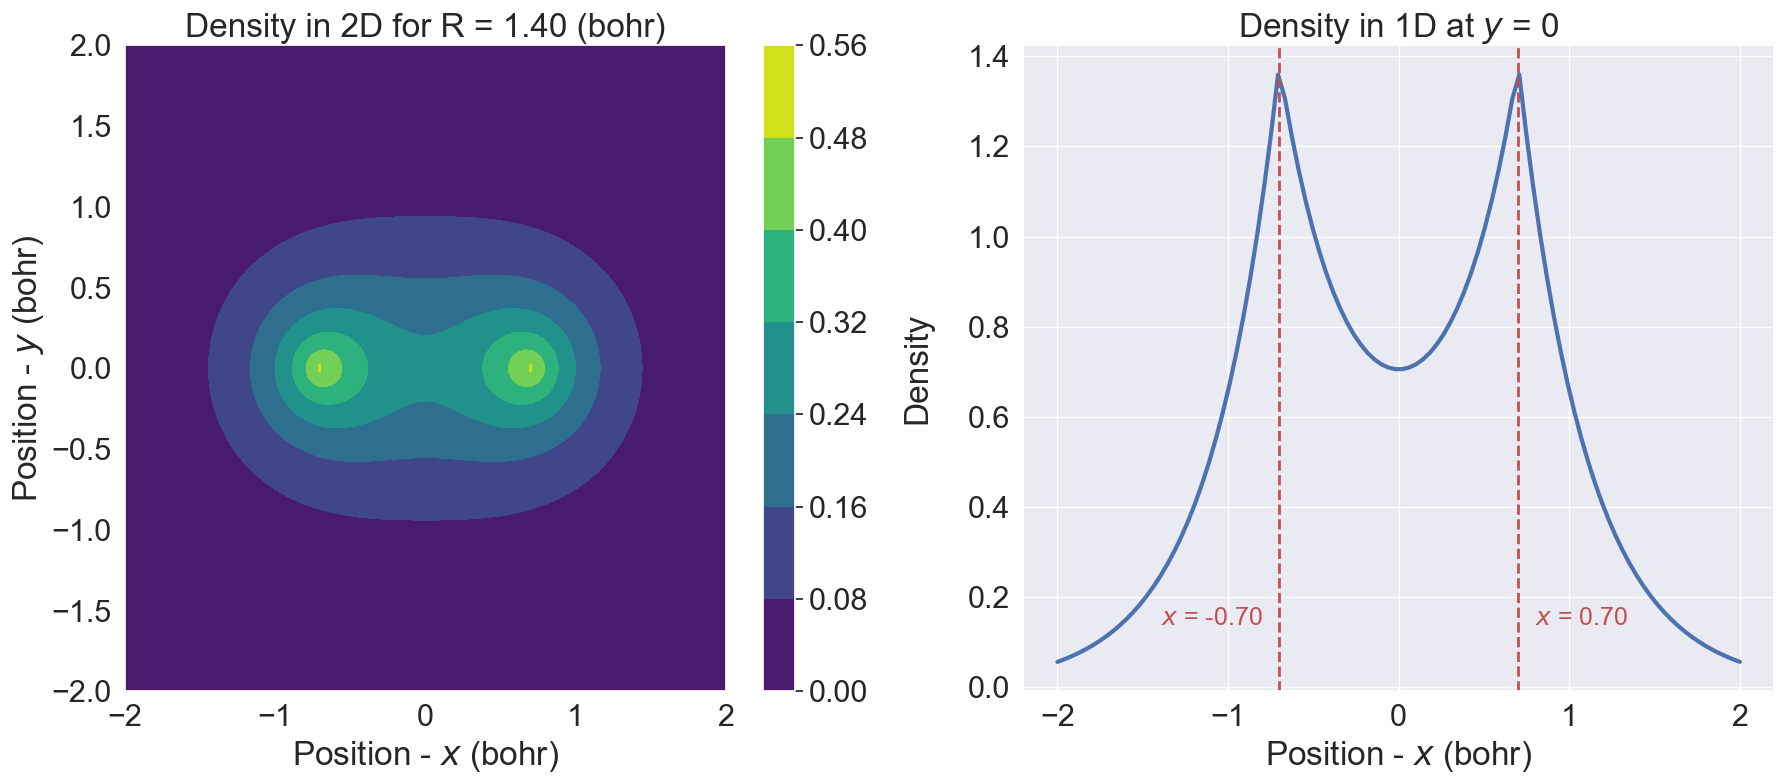

<function __main__.plot_func(R)>

In [2]:
# Apply seaborn styling
sns.set()  

alpha = 1.24  

def distance(x, y):
    return np.sqrt(x ** 2 + y ** 2)

def S(R):
    w = alpha * R
    w2 = w * w
    return math.exp(-w) * (1 + w + w2 / 3)   

def plot_func(R):
    d = 2.0
    x = np.linspace(-d, d, 100)
    y = np.linspace(-d, d, 100)
    
    X, Y = np.meshgrid(x, y)
    
    ra = distance(X - R / 2, Y)
    rb = distance(X + R / 2, Y)
    
    Z = (alpha**3 / (math.pi * (1 + S(R)))) * (np.exp(-alpha * ra) + np.exp(-alpha * rb)) ** 2
    
    plt.figure(figsize=(18, 8))
    
    plt.subplot(1, 2, 1)
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.title(f'Density in 2D for R = {R:.2f} (bohr)', fontsize=24)
    cbar = plt.colorbar()
    cbar.set_label('Density', fontsize=24, labelpad=25)
    cbar.ax.tick_params(labelsize=22)

    plt.xlabel('Position - $x$ (bohr)', fontsize=24)
    plt.ylabel('Position - $y$ (bohr)', fontsize=24)  # Added labelpad here
    plt.tick_params(axis='both', which='major', labelsize=22)
    
    ra_1d = distance(x - R / 2, 0)
    rb_1d = distance(x + R / 2, 0)
    density_1d = (np.exp(-alpha * ra_1d) + np.exp(-alpha * rb_1d)) ** 2
    
    plt.subplot(1, 2, 2)
    plt.plot(x, density_1d, linewidth=3)
    
    # Add vertical lines at the two maxima
    offset = 0.1
    
    plt.axvline(-R/2, color='r', linestyle='--', linewidth=2)
    plt.axvline(R/2, color='r', linestyle='--', linewidth=2)
    
    # Add labels to the vertical lines
    plt.text(-R/2 - offset, np.max(density_1d) * 0.1, f'$x$ = {-R/2:.2f}', color='r', fontsize=18, ha='right')  
    plt.text(R/2 + offset, np.max(density_1d) * 0.1, f'$x$ = {R/2:.2f}', color='r', fontsize=18, ha='left')  
    
    plt.title('Density in 1D at $y$ = 0', fontsize=24)
    plt.xlabel('Position - $x$ (bohr)', fontsize=24)
    #plt.ylabel('Density', fontsize=24) 
    plt.tick_params(axis='both', which='major', labelsize=22)
    
    plt.tight_layout()
    plt.show()

interact(plot_func, R=FloatSlider(min=0, max=3, step=0.1, value=1.4, description='R (Bohr)'))
